STEP 1 — Import + Load Cleaned Data

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("final.csv")

df.head()
df.shape


(414363, 23)

STEP 2 — Select Final Features (Drop Useless Columns)


In [9]:


drop_cols = ["region_url"]   # region_url is not useful for ML

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

STEP 3 — Identify Numerical + Categorical Columns

In [10]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols

(['price',
  'year',
  'cylinders',
  'odometer',
  'lat',
  'long',
  'posting_day',
  'posting_month',
  'posting_year'],
 ['region',
  'manufacturer',
  'model',
  'condition',
  'fuel',
  'title_status',
  'transmission',
  'drive',
  'size',
  'type',
  'paint_color',
  'state',
  'posting_date'])

STEP 4 — Label-Encoding Categorical Columns

In [11]:


le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

STEP 5 — Make Correlation Matrix for Feature Selection

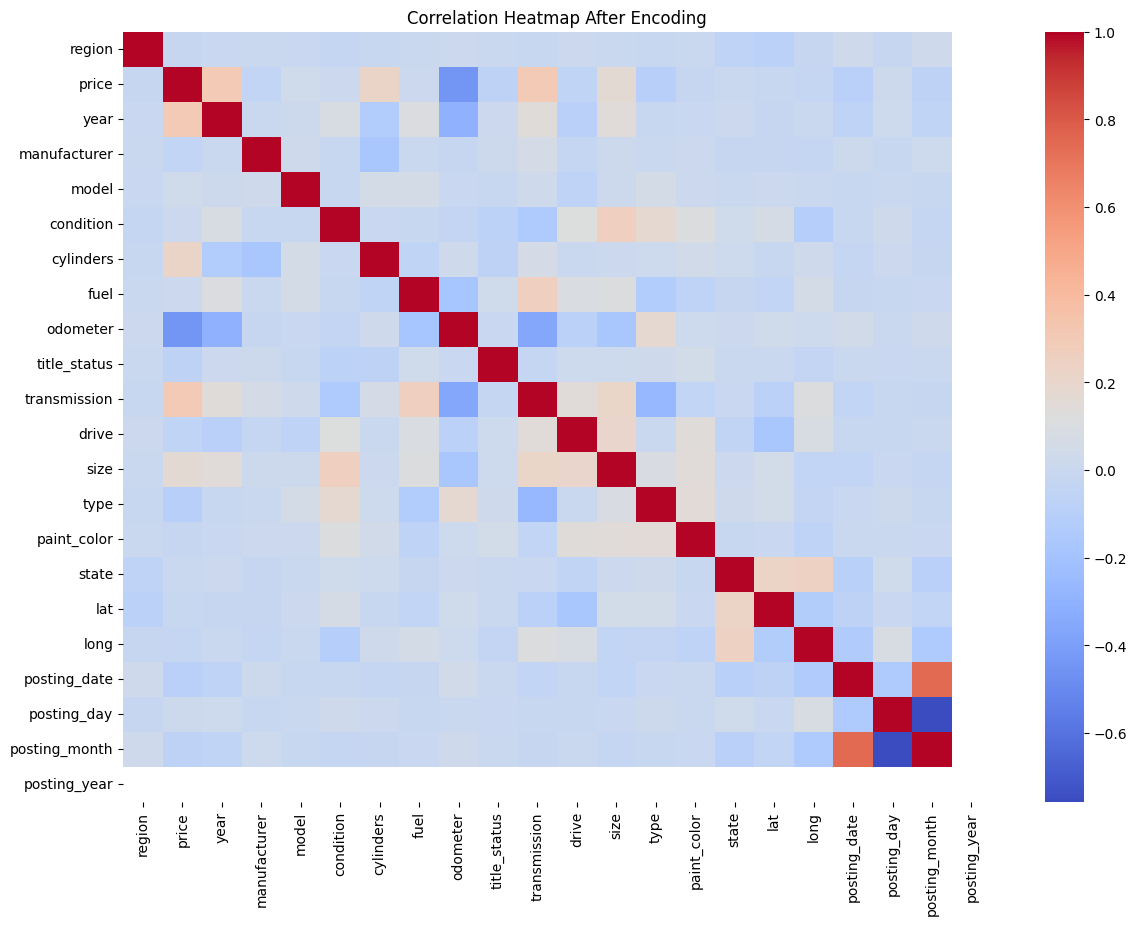

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap After Encoding")
plt.show()

STEP 6 — Final Check Before ML

In [13]:

df.head()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414363 entries, 0 to 414362
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         414363 non-null  int64  
 1   price          414363 non-null  int64  
 2   year           414363 non-null  float64
 3   manufacturer   414363 non-null  int64  
 4   model          414363 non-null  int64  
 5   condition      414363 non-null  int64  
 6   cylinders      414363 non-null  float64
 7   fuel           414363 non-null  int64  
 8   odometer       414363 non-null  float64
 9   title_status   414363 non-null  int64  
 10  transmission   414363 non-null  int64  
 11  drive          414363 non-null  int64  
 12  size           414363 non-null  int64  
 13  type           414363 non-null  int64  
 14  paint_color    414363 non-null  int64  
 15  state          414363 non-null  int64  
 16  lat            414363 non-null  float64
 17  long           414363 non-nul

,count,mean,std,min,25%,50%,75%,max
region,414363.0,195.339779,117.091170,0.000000,85.000000,199.0000,292.00000,403.000000
price,414363.0,16407.998352,13152.102015,0.000000,5895.000000,13500.0000,25590.00000,57341.000000
year,414363.0,2011.270335,9.256543,1900.000000,2008.000000,2013.0000,2017.00000,2022.000000
manufacturer,414363.0,9.854222,5.787225,0.000000,6.000000,9.0000,15.00000,20.000000
model,414363.0,14442.373735,7618.877751,0.000000,8107.000000,14016.0000,21507.50000,27294.000000
condition,414363.0,3.178848,2.473294,0.000000,1.000000,2.0000,6.00000,6.000000
cylinders,414363.0,5.963086,1.218560,3.000000,6.000000,6.0000,6.00000,12.000000
fuel,414363.0,2.053091,0.776836,0.000000,2.000000,2.0000,2.00000,5.000000
odometer,414363.0,90566.414579,59948.285731,0.000000,39175.500000,85548.0000,132000.00000,275515.000000
title_status,414363.0,0.238525,1.075382,0.000000,0.000000,0.0000,0.00000,6.000000


STEP 7 — Save ML-ready Data

In [15]:

df.to_csv("ready_for_model.csv", index=False)
print("Saved ML ready data → ready_for_model.csv")

Saved ML ready data → ready_for_model.csv


✅ ML-ready if:

All columns show:

int64
float64

❌ Not ML-ready if you see:
object
string
category

In [17]:
df.dtypes


region             int64
price              int64
year             float64
manufacturer       int64
model              int64
condition          int64
cylinders        float64
fuel               int64
odometer         float64
title_status       int64
transmission       int64
drive              int64
size               int64
type               int64
paint_color        int64
state              int64
lat              float64
long             float64
posting_date       int64
posting_day      float64
posting_month    float64
posting_year     float64
dtype: object